<a href="https://colab.research.google.com/github/rohitkg83/Deep_Learning/blob/main/IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Model for predicting IRIS types

This notebook aims to use neural networks for building a model that can predict three different types of irises - **Setosa, Versicolour and Virginica** from Sepal length, Sepal width, Petal length and Petal width. The dataset has been imported from scikit-learn and it has in total 150 observations. Tensorflow keras has been used for building the model.

In [1]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

In [2]:
# Setting up the seed for random number generators so that model reproduces same output when code is run
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [3]:
# load dataset into iris and set-up predictor and target variables
iris = datasets.load_iris()
X = iris.data[:]
y = to_categorical(iris.target) # to_categorical performs onhot encoding of target variable

In [4]:
# Verify shape of predictor
X.shape

(150, 4)

In [5]:
# Store number of predictor attributes in a variable
n_cols = X.shape[1]

In [6]:
# Verify shape of target
y.shape

(150, 3)

In [7]:
#Splitting the dataset into train and test data
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Set up model
model = Sequential()

# Add hidden layer with 32 nodes and use relu activation function
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add output layer and use softmax activation function
model.add(Dense(3, activation='softmax'))

# Compile the model using 'adam' optimizer, 'categorical_crossentropy' as loss function and 'accuracy' as the metrics for model performance
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Fit the model: use batch_size = 50 and epochs = 200
history = model.fit(X,y, batch_size=50, epochs=200, validation_split=0.1)

Epoch 1/200
3/3 [==============================] - 2s 330ms/step - loss: 2.3876 - accuracy: 0.2593 - val_loss: 0.0698 - val_accuracy: 1.0000
Epoch 2/200
3/3 [==============================] - 0s 26ms/step - loss: 2.1632 - accuracy: 0.2593 - val_loss: 0.1010 - val_accuracy: 1.0000
Epoch 3/200
3/3 [==============================] - 0s 39ms/step - loss: 1.9618 - accuracy: 0.2593 - val_loss: 0.1440 - val_accuracy: 1.0000
Epoch 4/200
3/3 [==============================] - 0s 59ms/step - loss: 1.7693 - accuracy: 0.2593 - val_loss: 0.2008 - val_accuracy: 1.0000
Epoch 5/200
3/3 [==============================] - 0s 26ms/step - loss: 1.6029 - accuracy: 0.2593 - val_loss: 0.2732 - val_accuracy: 1.0000
Epoch 6/200
3/3 [==============================] - 0s 30ms/step - loss: 1.4613 - accuracy: 0.2593 - val_loss: 0.3618 - val_accuracy: 1.0000
Epoch 7/200
3/3 [==============================] - 0s 23ms/step - loss: 1.3335 - accuracy: 0.2593 - val_loss: 0.4668 - val_accuracy: 1.0000
Epoch 8/200
3/3 [==

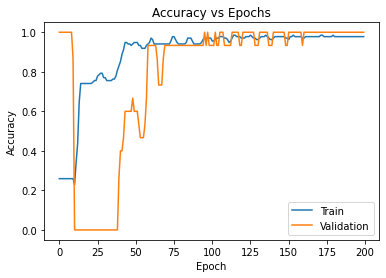

In [9]:
# Plotting Accuracy of Training and Validation set against Epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

In [10]:
# Model evaluation on the test set
model.evaluate(X_test, y_test, verbose = 1)
test_pred = np.round(model.predict(X_test))

1/1 [==============================] - 0s 38ms/step - loss: 0.2022 - accuracy: 1.0000


In [11]:
# Printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30
 samples avg       1.00      1.00      1.00        30

